In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime 
from print_color import print
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [2]:
#boab = yf.download("AMZN","2021-11-24","2023-05-10")
#boab.to_csv("AMAZON_2021-11-24_2023-05-10.csv")
#print(len(boab))
#boab = pd.read_csv("AMAZON_2021-11-24_2023-05-10.csv")
#boab = boab.set_index(boab["Date"]).drop("Date",axis=1)


In [3]:
BOAB = pd.read_csv("../data/BRVM-Public-Services.csv",index_col="Date")

In [4]:
debut = -730
fin = len(BOAB)
boab = BOAB.iloc[debut:]

# Oscillateur Stochastique

In [5]:
low = 14#14
hight = 14#14

d = 3#3
l = 0

In [6]:
#Determinons si le marche est un surachat ou en survente 
prix_bas = boab['Low'].rolling(low).min()
prix_eleve = boab['High'].rolling(hight).max()
cloture = boab["Close"]

boab["%k"] = ((cloture - prix_bas) / (prix_eleve - prix_bas)) * 100
boab["%d"] = boab['%k'].rolling(d).mean()

C:\Users\steph\AppData\Local\Temp\ipykernel_6872\297315229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boab["%k"] = ((cloture - prix_bas) / (prix_eleve - prix_bas)) * 100
C:\Users\steph\AppData\Local\Temp\ipykernel_6872\297315229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boab["%d"] = boab['%k'].rolling(d).mean()


# Moyenne mobile convergence divergence

In [7]:
rapide_ = 12#12 ; 6
lente_ =  26 #26 ; 10 
signal_ = 9 #9 ; 7

In [8]:
#determination de l'indicateur moyenne mobile convergence divergence

ema_rapide = cloture.ewm(span = rapide_ , adjust = False).mean()
ema_lente = cloture.ewm(span = lente_, adjust = False).mean()

# MACD
macd = pd.DataFrame(ema_rapide - ema_lente).rename(columns = {'Close':'MACD'})

# SIGNALE
ema_macd = macd.ewm(span=signal_,adjust=False).mean()
signale = pd.DataFrame(ema_macd.rename(columns={"MACD":"Signale"}))

# HISTOGRAMME
histogramme = pd.DataFrame(macd['MACD']-signale['Signale']).rename(columns = {0:"hist"})
histogramme.tail() ;


In [9]:
boab['MACD'] = macd
boab['Signale'] = signale
boab["Histogramme"] = histogramme


C:\Users\steph\AppData\Local\Temp\ipykernel_6872\118403462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boab['MACD'] = macd
C:\Users\steph\AppData\Local\Temp\ipykernel_6872\118403462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boab['Signale'] = signale
C:\Users\steph\AppData\Local\Temp\ipykernel_6872\118403462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
boab = boab.dropna()

In [11]:
data = boab.iloc[-4:][["Dernier","Ouv." , " Plus Haut","Plus Bas","%k","%d","MACD","Signale","Histogramme"]]

In [12]:
text=''
for i in range(len(data)) :
    text+=f"\t{data.iloc[i].name}"
    for d in data.iloc[i]:
        text+=f"\t&{d}"
    text+="\t\\\  \n"#\cline{2-6}\n"
print(text)

	10/05/2023	&482,27	&481,66	&492,36	&479,30	&68.53757405675076	&86.06470108726013	&-1.276063445112129	&-2.537857868750189	&1.2617944236380598	\\  
	11/05/2023	&486,77	&482,27	&486,77	&480,22	&82.56937948238219	&83.54706245125273	&-0.5964509485375515	&-2.1495764847076617	&1.5531255361701102	\\  
	12/05/2023	&489,95	&486,77	&490,69	&483,95	&92.48518864982842	&81.1973807296538	&0.19648136015803175	&-1.680364915734523	&1.8768462758925548	\\  
	15/05/2023	&468,96	&489,95	&489,95	&459,94	&27.82233189389259	&67.62563334203442	&-0.8589304362787971	&-1.516078019843378	&0.657147583564581	\\  



In [13]:
data

,Dernier,Ouv.,Plus Haut,Plus Bas,%k,%d,MACD,Signale,Histogramme
Date,,,,,,,,,
10/05/2023,"482,27","481,66","492,36","479,30",68.537574,86.064701,-1.276063,-2.537858,1.261794
11/05/2023,"486,77","482,27","486,77","480,22",82.569379,83.547062,-0.596451,-2.149576,1.553126
12/05/2023,"489,95","486,77","490,69","483,95",92.485189,81.197381,0.196481,-1.680365,1.876846
15/05/2023,"468,96","489,95","489,95","459,94",27.822332,67.625633,-0.858930,-1.516078,0.657148


## Nous achetons et ne vendons en nous basant à la fois sur MACD et le RSI

In [14]:
# strategie de trading
cloture = boab['Close']
macd = boab['MACD']
signale_macd = boab['Signale']
k = boab['%k']
d = boab['%d']
stock = 0 

prix_achat = []
prix_vente = []

stoc_macd_signal = []
position = []
signal_achat = []
signal_vente = []
achat_et_vente = []



for i in range(len(cloture)) :

    if k.iloc[i]<30 and d.iloc[i]<30 and macd.iloc[i]<-l and signale_macd.iloc[i]<-l :
        signal_achat.append(cloture.iloc[i])
        signal_vente.append(np.nan)
        
        if stock != 1 and cloture.iloc[i]>0 :
            achat_et_vente.append("acheter")
            prix_achat.append( cloture.iloc[i] )
            prix_vente.append( np.nan )
            stock = 1
            stoc_macd_signal.append(0)
            position.append(1)

        else :
            achat_et_vente.append(np.nan)
            prix_achat.append(np.nan)
            prix_vente.append(np.nan)
            stoc_macd_signal.append(0)
            position.append(1)

    elif k.iloc[i]>70 and d.iloc[i]>70 and macd.iloc[i]>l and signale_macd.iloc[i]>l :
        signal_vente.append(cloture.iloc[i])
        signal_achat.append(np.nan)

        if stock != -1 and stock != 0 :
            achat_et_vente.append("vendre")
            prix_vente.append( cloture.iloc[i] )
            prix_achat.append( np.nan )
            stock = -1
            stoc_macd_signal.append(stock)
            position.append(0)
        
        else :
            achat_et_vente.append(np.nan)
            prix_achat.append(np.nan)
            prix_vente.append(np.nan)
            stoc_macd_signal.append(0)
            position.append(0)
    
    else :
        achat_et_vente.append(np.nan)
        signal_achat.append(np.nan)
        signal_vente.append(np.nan)

        prix_achat.append( np.nan )
        prix_vente.append( np.nan )
        stoc_macd_signal.append(0)
        
        if stock == 0 :
            position.append(0)
        
        else :
            position.append(position[i-1])

boab['achat_vente'] = achat_et_vente



C:\Users\steph\AppData\Local\Temp\ipykernel_6872\3986275463.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boab['achat_vente'] = achat_et_vente


Text(0.5, 1.0, "Stratégie combiné de la MACD et de l'Osciallateur Stochastique sur BRVm-Services_Publics")

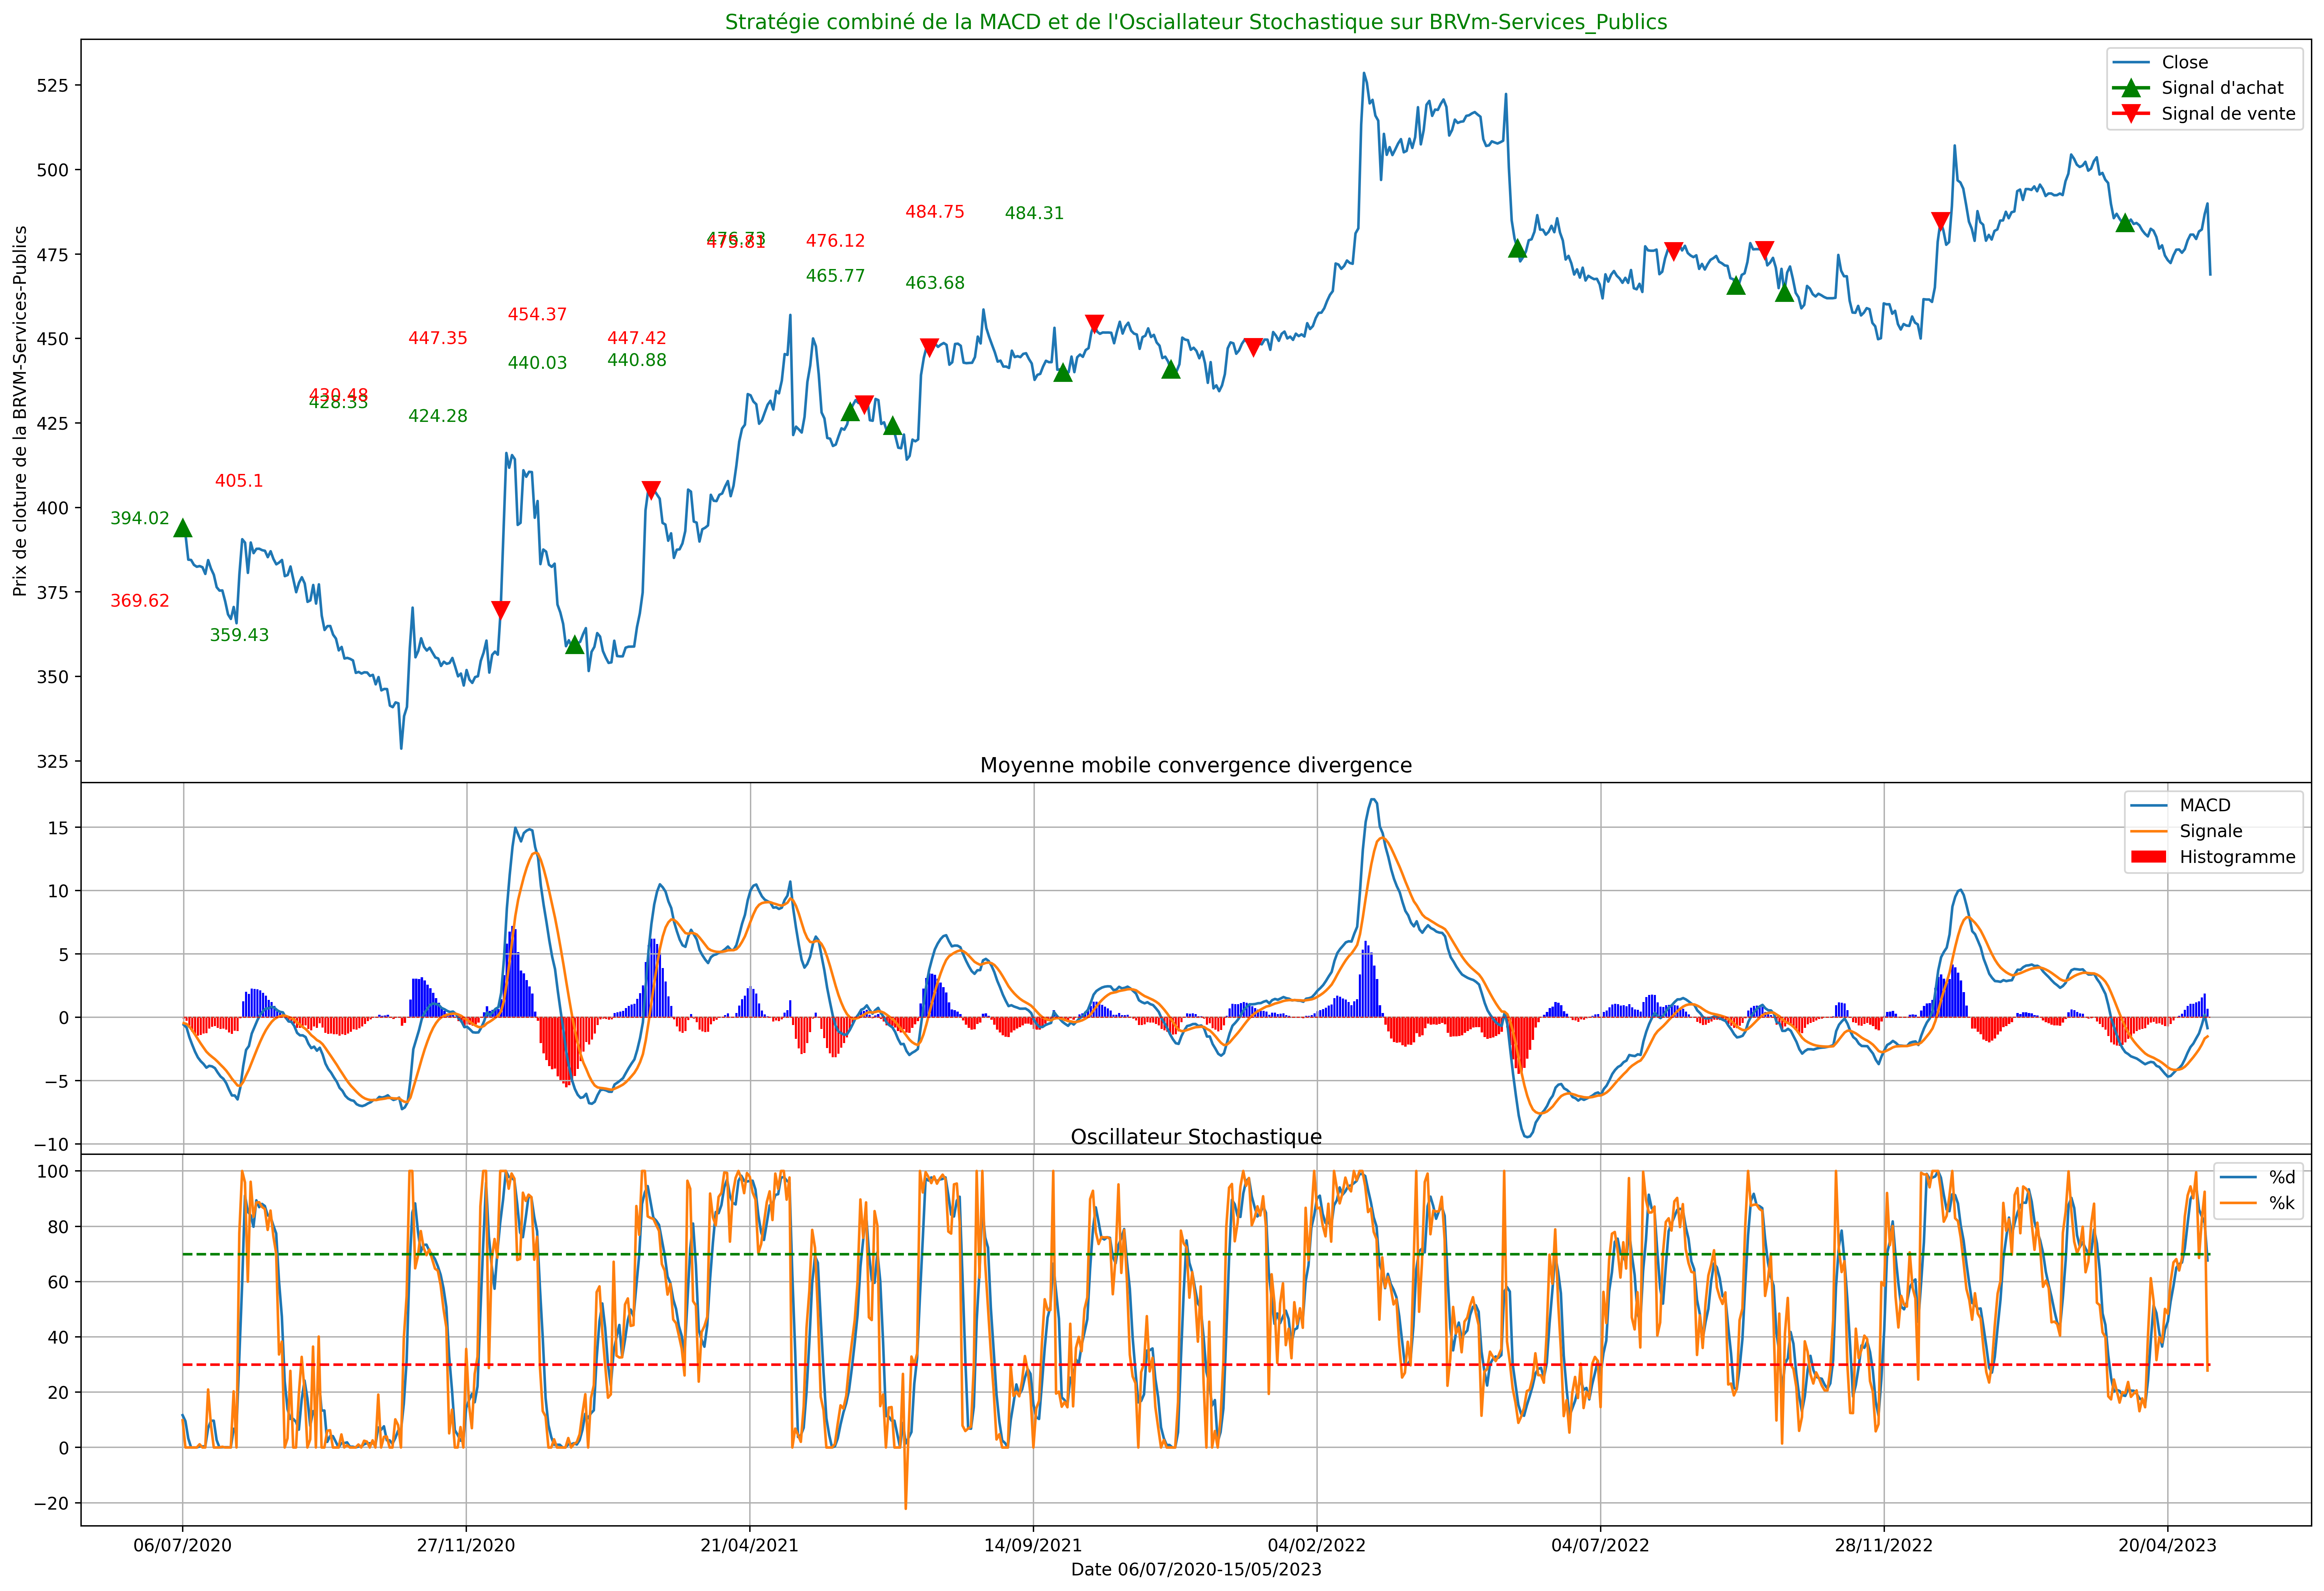

In [15]:
fig  = plt.figure(figsize=(18,6) , dpi=350) 
d = str(boab.index[0]) ; f = str(boab.index[len(boab)-1])


axe1 = fig.add_axes([0,1,1,1])
boab['Close'].plot(ylabel="Prix de cloture de la BRVM-Services-Publics",xlabel=(f"Date {d}-{f}"))
axe1.plot(boab.index ,prix_achat , marker='^',color='green',markersize=10,label = "Signal d'achat",linewidth=2)
axe1.plot(boab.index ,prix_vente , marker='v',color='red',markersize=10,label = "Signal de vente",linewidth=2)
plt.legend()

j=-15
for i, yi in enumerate(prix_achat):
    if yi >0:
        plt.text(j, yi, str(yi), color='green', ha='center', va='bottom')
        j+=35

j=-15
for i, yi in enumerate(prix_vente):
    if yi >0:
        plt.text(j, yi, str(yi), color='red', ha='center', va='bottom')
        j+=35


axe2 = fig.add_axes([0,0.5,1,0.5])
boab['MACD'].plot()
boab['Signale'].plot()
axe2.set_title("Moyenne mobile convergence divergence")

hist = boab['Histogramme'].values
couleurs = ['red' if valeur < 0 else 'blue' for valeur in hist ]
# Tracé de l'histogramme avec des barres colorées
plt.bar(boab.index, hist, color=couleurs,label='Histogramme')

plt.plot([0,len(boab)] , [l,l] , color='green' ,linestyle='--', linewidth=0.5)
plt.plot([0,len(boab)] , [-l,-l] , color='red' ,linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()


axe3 = fig.add_axes([0,0,1,0.5]) ; axe3.set_title("Oscillateur Stochastique")
boab["%d"].plot(label = "%d")
boab['%k'].plot(label = '%k')
plt.plot([0,len(boab)] , [70,70] , color='green',linestyle='--' , linewidth=1.5)
plt.plot([0,len(boab)] , [30,30] , color='red' , linestyle='--',linewidth=1.5)
plt.grid(True)
plt.legend()
plt.xlabel(f"Date {d}-{f}")

axe1.set_title("Stratégie combiné de la MACD et de l'Osciallateur Stochastique sur BRVm-Services_Publics" , color='green')

## Backtesting

In [16]:
benefice_total = 0
depart = 1000
d=depart
nombre = 0
total = 0

for i in range( len( boab ) ) :
    if boab['achat_vente'].iloc[i] == 'acheter' :

        nombre = depart/boab['Close'].iloc[i]
        entrer = nombre*boab['Close'].iloc[i]
        print("Achat : ",boab['Close'].iloc[i])
        
    elif boab['achat_vente'].iloc[i] == 'vendre' :
        print("Vendre : ",boab['Close'].iloc[i])
        sorti = (nombre*boab['Close'].iloc[i])
        benefice_total += sorti-entrer
        depart = sorti

pourcentage_benefice = 100*(benefice_total/d)

Achat :  394.02
Vendre :  369.62
Achat :  359.43
Vendre :  405.1
Achat :  428.33
Vendre :  430.48
Achat :  424.28
Vendre :  447.35
Achat :  440.03
Vendre :  454.37
Achat :  440.88
Vendre :  447.42
Achat :  476.73
Vendre :  475.81
Achat :  465.77
Vendre :  476.12
Achat :  463.68
Vendre :  484.75
Achat :  484.31


In [17]:
date_depart = datetime.strptime( BOAB.iloc[debut].name , "%d/%m/%Y" ).strftime("%A %d %B, %Y ")
date_fin = datetime.strptime( BOAB.iloc[fin-1].name , "%d/%m/%Y" ).strftime("%A %d %B, %Y ")

print("Avec un capitale de depart de " ,end="")
print("{:,.2f} Fcfa".format(d) , color='green')
print("nous avons réalisé un benefice de ",end='')
print("{:.2f} %".format(pourcentage_benefice) , color='green')
print("Soit un benefice total de ",end='')
print("{:,.2f} Fcfa".format(pourcentage_benefice) , color='green')
print("Sur la periode allant du ",end='')
print(date_depart , color="blue" , end="") ; print(" au " ,end="")
print(date_fin , color="blue" , end="")

Avec un capitale de depart de 1,000.00 Fcfa
nous avons réalisé un benefice de 25.22 %
Soit un benefice total de 25.22 Fcfa
Sur la periode allant du lundi 15 juin, 2020  au lundi 15 mai, 2023 

In [18]:
format_ = "%Y-%m-%d"
format__ = "%d/%m/%Y"
date_depart = datetime.strptime( BOAB.iloc[debut].name , format__  ).strftime("%A %d %B, %Y ")
date_fin = datetime.strptime( BOAB.iloc[fin-1].name , format__ ).strftime("%A %d %B, %Y ")

print("Avec un capitale de depart de " ,end="")
print("{:,.2f} Fcfa".format(d) , color='green')
print("nous avons réalisé un benefice de ",end='')
print("{:.2f} %".format(pourcentage_benefice) , color='green')
print("Soit un benefice total de ",end='')
print("{:,.2f} Fcfa".format(benefice_total) , color='green')
print("Sur la periode allant du ",end='')
print(date_depart , color="blue" , end="") ; print(" au " ,end="")
print(date_fin , color="blue" , end="")

Avec un capitale de depart de 1,000.00 Fcfa
nous avons réalisé un benefice de 25.22 %
Soit un benefice total de 252.22 Fcfa
Sur la periode allant du lundi 15 juin, 2020  au lundi 15 mai, 2023 

In [19]:
31k =1

SyntaxError: invalid decimal literal (2466632642.py, line 1)

In [ ]:
df = pd.read_csv("../test/MACD_OSC_Court_BRVM-Agriculture.csv")
df["ratio"] = (df["positive"]/(df['negative']+df["positive"]))*100
df['rapide2'] = df['rapide']*2
df['lente10'] = df['Lente']+10

In [ ]:
len(df)

56196

In [ ]:
print(df["positive"].max())
df0 = df[(df["ratio"]>=80)]
df0

5


,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10
0,0,10,25,4,21.697,5,1,14,1,83.333333,20,35
1,1,10,25,4,22.654,5,1,15,2,83.333333,20,35
2,2,10,25,4,28.931,5,1,16,3,83.333333,20,35
3,3,10,25,4,28.931,5,1,17,4,83.333333,20,35
4,4,10,25,4,28.931,5,1,18,5,83.333333,20,35
...,...,...,...,...,...,...,...,...,...,...,...,...
56191,56191,55,100,6,6.033,1,0,16,56192,100.000000,110,110
56192,56192,55,100,6,9.089,1,0,17,56193,100.000000,110,110
56193,56193,55,100,6,9.089,1,0,18,56194,100.000000,110,110
56194,56194,55,100,6,9.947,1,0,19,56195,100.000000,110,110


In [ ]:
df1 = df0[df0['benefice']>=df0['benefice'].max()]
df1

,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10
6,6,10,25,4,29.105,5,1,20,7,83.333333,20,35


In [ ]:
p='Lente'
df1[df1[p]==df1[p].min()]

,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10,dif
130195,130195,54,108,6,14.5,1,0,20,130196,100.0,108,118,True


In [ ]:
l = 25; r =10
df[(df["Lente"]>=l-1)&(df["Lente"]<=l+1)&(df["rapide"]>=r-1)&(df["rapide"]<=r+1)][["Lente","rapide","benefice","positive","negative","niveau","signale"]]

,Lente,rapide,benefice,positive,negative,niveau,signale
0,25,10,21.697,5,1,14,4
1,25,10,22.654,5,1,15,4
2,25,10,28.931,5,1,16,4
3,25,10,28.931,5,1,17,4
4,25,10,28.931,5,1,18,4
...,...,...,...,...,...,...,...
1633,26,11,8.759,3,1,16,6
1634,26,11,8.759,3,1,17,6
1635,26,11,8.759,3,1,18,6
1636,26,11,6.923,3,1,19,6


In [ ]:
df[(df['benefice']==df['benefice'].max())&(df["positive"])]

,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10
6,6,10,25,4,29.105,5,1,20,7,83.333333,20,35


In [ ]:
df = pd.read_csv("../test/MACD_OSC_Court_BRVM-Agriculture().csv")
r = 10 ; l = 25
data = df[(df["Lente"]>=l-1)&(df["Lente"]<=l+1)&(df["rapide"]>=r-1)&(df["rapide"]<=r+1)&(df['niveau']==20)&(df['signale']==4)][["Lente","rapide","benefice","positive","negative",'niveau','signale']]

In [ ]:
data

,Lente,rapide,benefice,positive,negative,niveau,signale
720,24,9,29.090,5,1,20,4
741,25,9,25.515,5,1,20,4
762,26,9,29.105,5,1,20,4
930,24,10,25.515,5,1,20,4
951,25,10,29.105,5,1,20,4
972,26,10,18.682,4,1,20,4
1119,24,11,18.682,4,1,20,4
1140,25,11,20.111,4,1,20,4
1161,26,11,18.256,4,1,20,4


In [ ]:
text=''
for i in range(len(data)) :
    for d in data.iloc[i]:
        text+=f"\t&{d}"
    text+="\t\\\  \n"
print(text)

	&24.0	&9.0	&29.09	&5.0	&1.0	&20.0	&4.0	\\  
	&25.0	&9.0	&25.515	&5.0	&1.0	&20.0	&4.0	\\  
	&26.0	&9.0	&29.105	&5.0	&1.0	&20.0	&4.0	\\  
	&24.0	&10.0	&25.515	&5.0	&1.0	&20.0	&4.0	\\  
	&25.0	&10.0	&29.105	&5.0	&1.0	&20.0	&4.0	\\  
	&26.0	&10.0	&18.682	&4.0	&1.0	&20.0	&4.0	\\  
	&24.0	&11.0	&18.682	&4.0	&1.0	&20.0	&4.0	\\  
	&25.0	&11.0	&20.111	&4.0	&1.0	&20.0	&4.0	\\  
	&26.0	&11.0	&18.256	&4.0	&1.0	&20.0	&4.0	\\  



In [ ]:
data


,Lente,rapide,benefice,positive,negative,niveau,signale
102167,153,43,14.5,1,0,20,6
102211,154,43,14.5,1,0,20,6
102255,155,43,14.5,1,0,20,6
105335,153,44,14.5,1,0,20,6
105379,154,44,14.5,1,0,20,6
105423,155,44,14.5,1,0,20,6
108415,153,45,14.5,1,0,20,6
108459,154,45,14.5,1,0,20,6
108503,155,45,14.5,1,0,20,6


In [ ]:
for d in data.iloc[0] :
    print(d)

153.0
43.0
14.5
1.0
0.0
20.0
6.0


In [ ]:
df = pd.read_csv("../test/MACD_OSC_Court_BRVM-Public-Services.csv")
df["ratio"] = (df["positive"]/(df['negative']+df["positive"]))*100

In [ ]:
len(df)

56196

In [ ]:
df["ratio"] = (df["positive"]/(df['negative']+df["positive"]))*100
df['rapide2'] = df['rapide']*2
df['lente10'] = df['Lente']+10
df['dif'] = (df['Lente']>=df['rapide2'])&(df['Lente']<=(df['Lente']+10))

In [ ]:
print(df["benefice"].max() )
df0 = df[(df["ratio"]>=80)]
df0

39.758


,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10,dif
2,2,10,25,4,28.572,9,2,16,3,81.818182,20,35,True
3,3,10,25,4,28.087,9,2,17,4,81.818182,20,35,True
4,4,10,25,4,21.866,9,2,18,5,81.818182,20,35,True
5,5,10,25,4,21.139,8,2,19,6,80.000000,20,35,True
6,6,10,25,4,18.615,8,2,20,7,80.000000,20,35,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56191,56191,55,100,6,25.966,3,0,16,56192,100.000000,110,110,False
56192,56192,55,100,6,26.923,3,0,17,56193,100.000000,110,110,False
56193,56193,55,100,6,27.600,3,0,18,56194,100.000000,110,110,False
56194,56194,55,100,6,26.271,3,0,19,56195,100.000000,110,110,False


In [ ]:
df1=df0[df0['dif']==True]
df1

,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10,dif
2,2,10,25,4,28.572,9,2,16,3,81.818182,20,35,True
3,3,10,25,4,28.087,9,2,17,4,81.818182,20,35,True
4,4,10,25,4,21.866,9,2,18,5,81.818182,20,35,True
5,5,10,25,4,21.139,8,2,19,6,80.000000,20,35,True
6,6,10,25,4,18.615,8,2,20,7,80.000000,20,35,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52201,52201,50,100,6,27.540,3,0,16,52202,100.000000,100,110,True
52202,52202,50,100,6,28.508,3,0,17,52203,100.000000,100,110,True
52203,52203,50,100,6,28.995,3,0,18,52204,100.000000,100,110,True
52204,52204,50,100,6,29.180,3,0,19,52205,100.000000,100,110,True


In [ ]:
df0[df0['benefice']==df0['benefice'].max()]

,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10,dif
21670,21670,24,37,6,39.758,5,0,19,21671,100.0,48,47,False
23035,23035,25,36,6,39.758,5,0,19,23036,100.0,50,46,False


In [ ]:
l = 26; r = 36
DF = df[(df["Lente"]>=l-1)&(df["Lente"]<=l+1)&(df["rapide"]>=r-1)&(df["rapide"]<=r+1)]#[["Lente","rapide","benefice","positive","negative",'niveau']]

In [ ]:
r = 25 ; l = 36 
data = df[(df["Lente"]>=l-1)&(df["Lente"]<=l+1)&(df["rapide"]>=r-1)&(df["rapide"]<=r+1)&(df['positive']==5)&(df['niveau']==19)&(df['signale']==6)][["Lente","rapide","benefice","positive","negative",'niveau','signale']]
data

,Lente,rapide,benefice,positive,negative,niveau,signale
21628,35,24,26.048,5,0,19,6
21649,36,24,27.304,5,0,19,6
21670,37,24,39.758,5,0,19,6
23014,35,25,27.304,5,0,19,6
23035,36,25,39.758,5,0,19,6
23056,37,25,38.151,5,0,19,6
24400,36,26,38.151,5,0,19,6
24421,37,26,38.151,5,0,19,6


In [ ]:
text=''
for i in range(len(data)) :
    for d in data.iloc[i]:
        if str(d)[-2:] == ".0" :
            text+=f"\t&{int(d)}"
        else :
            text+=f"\t&{d}"
        
    text+="\t\\\ \n"
print(text)

	&35	&24	&26.048	&5	&0	&19	&6	\\ 
	&36	&24	&27.304	&5	&0	&19	&6	\\ 
	&37	&24	&39.758	&5	&0	&19	&6	\\ 
	&35	&25	&27.304	&5	&0	&19	&6	\\ 
	&36	&25	&39.758	&5	&0	&19	&6	\\ 
	&37	&25	&38.151	&5	&0	&19	&6	\\ 
	&36	&26	&38.151	&5	&0	&19	&6	\\ 
	&37	&26	&38.151	&5	&0	&19	&6	\\ 



In [ ]:
df[(df["Lente"]>=l-1)&(df["Lente"]<=l+1)&(df["rapide"]==r+1)&(df['positive']==5)&(df['niveau']==19)&(df['signale']>=5)]#[["Lente","rapide","benefice","positive","negative",'niveau']]

,Unnamed: 0,rapide,Lente,signale,benefice,positive,negative,niveau,id,ratio,rapide2,lente10,dif
10503,10503,22,44,5,32.427,5,0,19,10504,100.0,44,54,True
10514,10514,22,44,6,37.286,5,0,19,10515,100.0,44,54,True
10547,10547,22,45,5,32.585,5,0,19,10548,100.0,44,55,True
10591,10591,22,46,5,37.366,5,0,19,10592,100.0,44,56,True
